In [1]:
#dependencies
import json
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
#read in data
df=pd.read_csv('data/stories_for_viz.csv')

In [3]:
font={'family': 'arial',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }

In [4]:
desc_sent_arr=[]
tags_sent_arr=[]
for desc in df['description']:
    desc_sent_arr.append(analyzer.polarity_scores(desc)['compound'])
for tag in df['tags']:
    
    list=tag.split("', '")
    list=list[1:len(list)-1]
    tags_sent_arr.append(analyzer.polarity_scores(' '.join(list))['compound'])
    


In [5]:
df['description sentiment (compound)']=desc_sent_arr
df['tag sentiment (compound)']=tags_sent_arr
df.columns

Index(['id', 'title', 'description', 'url', 'createDate', 'modifyDate',
       'completed', 'numParts', 'deleted', 'length', 'categoryId',
       'categoryName', 'languageId', 'languageName', 'mature', 'rating',
       'tags', 'commentCount', 'readCount', 'voteCount', 'userAvatar',
       'userFullname', 'userName', 'description sentiment (compound)',
       'tag sentiment (compound)'],
      dtype='object')

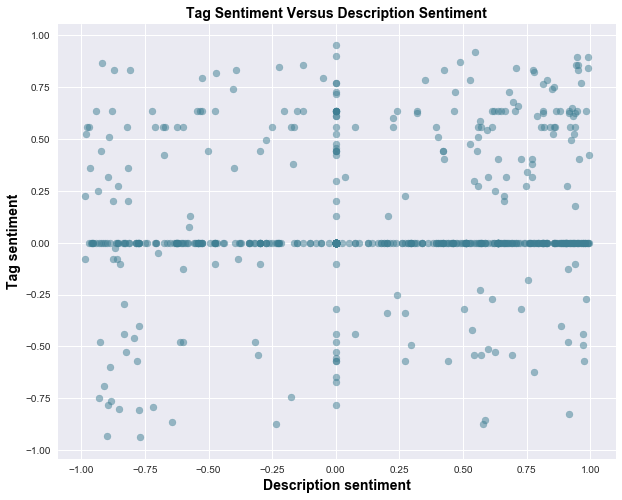

In [23]:
plt.figure(figsize=(10,8))
plt.scatter(x=df['description sentiment (compound)'], y=df['tag sentiment (compound)'],alpha=.5,\
            color=seaborn.diverging_palette(220, 20, n=1), )
plt.xlabel('Description sentiment',fontdict=font)
plt.ylabel('Tag sentiment',fontdict=font)
plt.title('Tag Sentiment Versus Description Sentiment',fontdict=font)
plt.savefig('images/tag_sent_v_desc_sent.png')
plt.show()

In [7]:
bins=[-1,-.5,-.01,0.1,.5,1]
group_names = ['Very Negative', 'Negative','Neutral', 'Positive', 'Very Positive']
df_tags_bins=pd.cut(df['tag sentiment (compound)'], bins, labels=group_names)
df_tags_bins_counts=df_tags_bins.value_counts()
df_tags_bins_counts=df_tags_bins_counts[group_names]

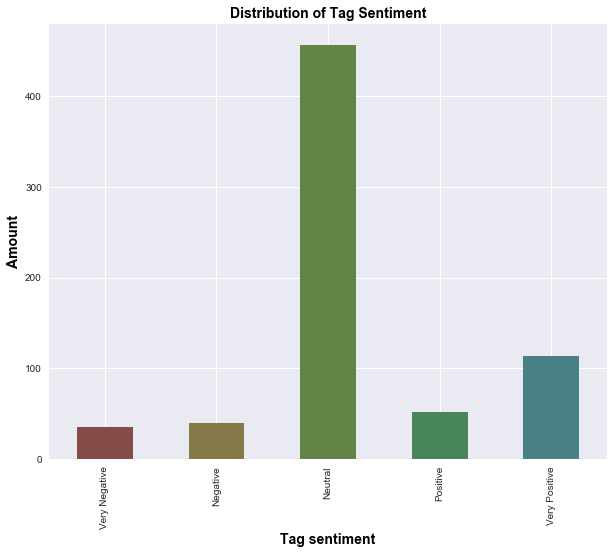

In [24]:
plt.figure(figsize=(10,8))
df_tags_bins_counts.plot(kind='bar',color=seaborn.hls_palette(8, l=.4, s=.3))
plt.xlabel('Tag sentiment',fontdict=font)
plt.ylabel('Amount',fontdict=font)
plt.title('Distribution of Tag Sentiment',fontdict=font)
plt.savefig('images/TagSentimentBar.png')
plt.show()

In [9]:
bins=[-1,-.5,-.01,0.1,.5,1]
group_names = ['Very Negative', 'Negative','Neutral', 'Positive', 'Very Positive']
df_description_bins=pd.cut(df['description sentiment (compound)'], bins, labels=group_names)
df_description_bins_counts=df_description_bins.value_counts()
df_description_bins_counts=df_description_bins_counts[group_names]

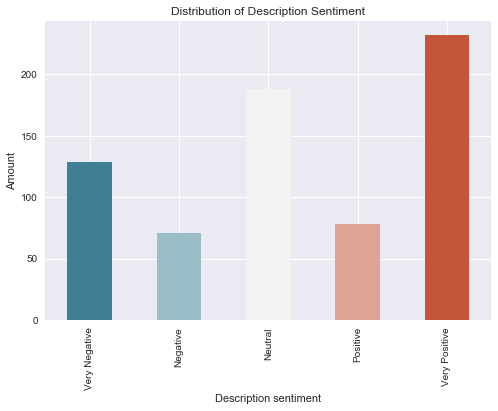

In [10]:
df_description_bins_counts.plot(kind='bar',color=seaborn.diverging_palette(220, 20, n=5))
plt.xlabel('Description sentiment')
plt.ylabel('Amount')
plt.title('Distribution of Description Sentiment')
plt.savefig('images/DescriptionSentimentBar.png')
plt.show()